In [103]:
import cv2
from matplotlib import pyplot as plt

In [104]:
# 图像的显示
def cv_show(name,img):
    cv2.imshow(name,img)
    cv.waitKey()
    cv2.destroyAllWindows()

# plt彩色图片显示
def plt_show0(img):
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    plt.imshow(img)
    plt.show()
    
# plt显示灰度图片
def plt_show(img):
    plt.imshow(img,cmap="gray")
    plt.show()

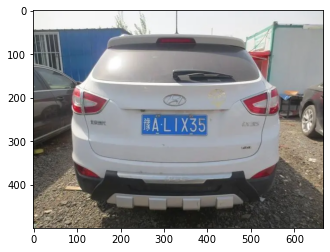

In [105]:
# 加载图片
img = cv2.imread("./images/license.jpg")
plt_show0(img)

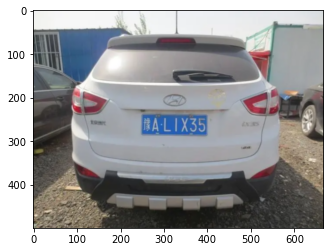

In [106]:
#高斯降噪
image = cv2.GaussianBlur(img,(3,3),0)
plt_show0(image)

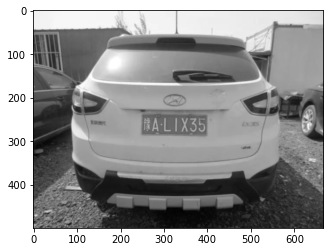

In [107]:
# 灰度处理
# print(image.shape)
gray_img = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt_show(gray_img)

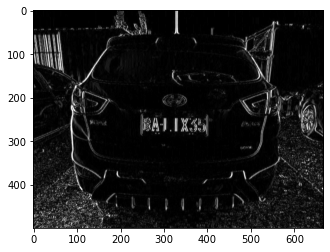

In [108]:
# sobel算子边缘检测
Sobel_x = cv2.Sobel(gray_img,cv2.CV_16S,1,0)
# Sobel_y = cv2.Sobel(gray_img,cv2.CV_16S,0,1)
absX = cv2.convertScaleAbs(Sobel_x)
# absY = cv2.convertScaleAbs(Sobel_y)
# dst = cv2.addWeighted(absX,0.5,absY,0.5,0.5)
image = absX
plt_show(image)

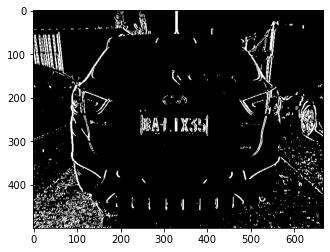

In [109]:
# 自适应阈值处理
ret,image = cv2.threshold(image,0,255,cv2.THRESH_OTSU)
plt_show(image)

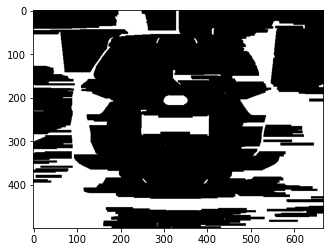

In [110]:
#闭运算 将白色部分连成整体
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT,(30,3))
image = cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernelX,iterations=2)
plt_show(image)

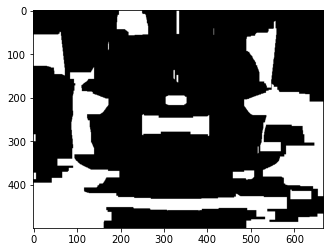

In [111]:
# 去除图中细小白点
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT,(20,1))
kernelY = cv2.getStructuringElement(cv2.MORPH_RECT,(1,15))
#膨胀 腐蚀
image = cv2.dilate(image,kernelX)
image = cv2.erode(image,kernelX)
# 腐蚀 膨胀
image = cv2.erode(image,kernelY)
image = cv2.dilate(image,kernelY)
plt_show(image)

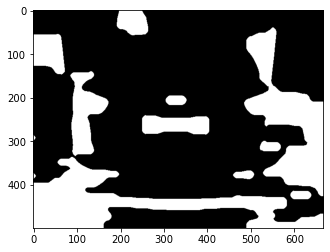

In [112]:
# 中值滤波去除噪点
image = cv2.medianBlur(image,15)
plt_show(image)

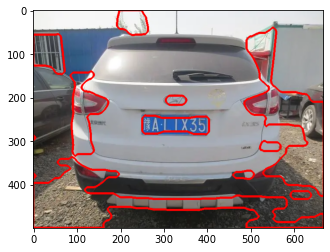

In [113]:
#轮廓检测
contours,hierarchy = cv2.findContours(image,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# 绘制轮廓
image1 = img.copy()
cv2.drawContours(image1,contours,-1,(0,0,255),3)
plt_show0(image1)

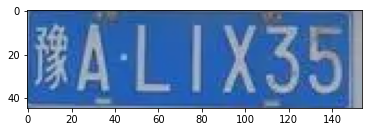

In [115]:
#筛选车牌轮廓
for item in contours:
#     boundingRect用一个最小的矩形，把找到的轮廓形状包含在其中
    rect = cv2.boundingRect(item)
    x = rect[0]
    y = rect[1]
    weight = rect[2]
    height = rect[3]
    if(weight>(height*2.5) and weight<(height*4)):
        image = img[y:y+height,x:x+weight]
        plt_show0(image)
        cv2.imwrite("./car_license/license1.jpg",image)